# Reading Jungfrau .dat files

In [15]:
#add the aare build folder to sys.path to make it visible to python
import sys; sys.path.append('/home/l_msdetect/erik/aare/build')
from helpers import nb_aare_version
nb_aare_version()

#Our normal python imports
from pathlib import Path
import matplotlib.pyplot as plt
from mpl_toolkits.axes_grid1 import make_axes_locatable
import numpy as np
import boost_histogram as bh
import time

#Directly import what we need
from aare import JungfrauDataFile


full_mod = Path('/mnt/sls_det_storage/jungfrau_calib/data/Module_568_Calib/CuFluoHG0_M568_2025-02-07_000000.dat')
single_chip = Path('/mnt/sls_det_storage/jungfrau_data1/ESRF_pencilBeam_14k/module77_C7_45keV_5us_X954_Y423_14kf_beam_000000.dat') 

Example run on: **2025-04-04 16:04** with aare: **dev**

## Read and plot a single frame

In [16]:
f = JungfrauDataFile(full_mod)
print(f'Base file name: {f.base_name}')
print(f'Image shape: {f.rows}, {f.cols}')
print(f'Found {f.n_files} files')
print(f'Total {f.total_frames} frames')


Base file name: CuFluoHG0_M568_2025-02-07
Image shape: 512, 1024
Found 22 files
Total 220000 frames


Opening file: /mnt/sls_det_storage/jungfrau_calib/data/Module_568_Calib/CuFluoHG0_M568_2025-02-07_000000.dat


In [18]:
header, image = f.read_frame()
print('Read frame:', header['framenum'][0])

Read frame: 264002


Text(0.5, 1.0, 'frame_number: 264002')

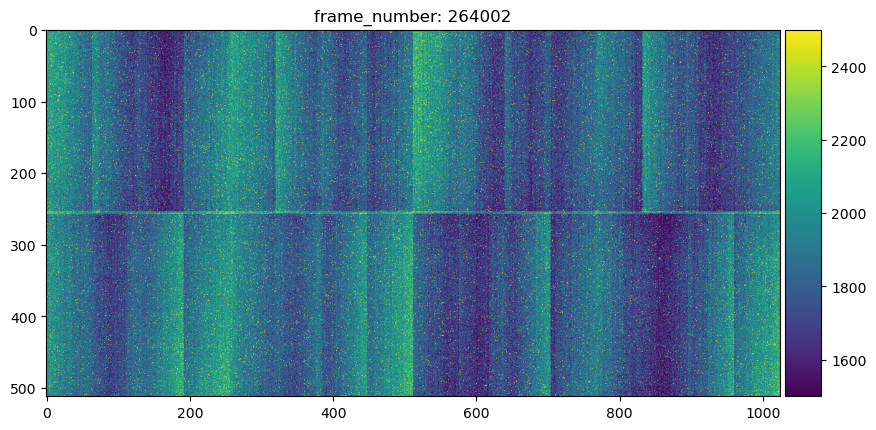

In [25]:
fig, ax = plt.subplots(figsize = (10,5))
im = ax.imshow(image)
im.set_clim(1500,2500)
divider = make_axes_locatable(ax)
cax = divider.append_axes("right", size="5%", pad=0.05)
plt.colorbar(im, cax=cax)
ax.set_title(f"frame_number: {header['framenum'][0]}")

## Read multiple frames (also across files)

Opening file: /mnt/sls_det_storage/jungfrau_calib/data/Module_568_Calib/CuFluoHG0_M568_2025-02-07_000000.dat
Opening file: /mnt/sls_det_storage/jungfrau_calib/data/Module_568_Calib/CuFluoHG0_M568_2025-02-07_000001.dat


[273991 273992 273993 273994 273995 273996 273997 273998 273999 274000
 274001 274002 274003 274004 274005 274006 274007 274008 274009 274010]


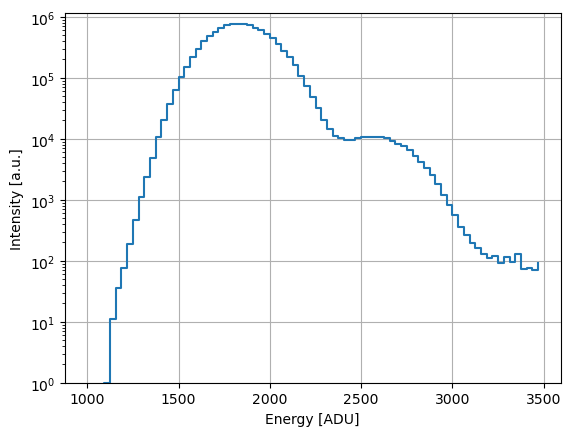

In [42]:
f = JungfrauDataFile(full_mod)
f.seek(9990)
headers, images = f.read_n(20)
print(headers['framenum'])

t0 = time.perf_counter()
hist1 = bh.Histogram(bh.axis.Regular(80, 1000, 3500))
hist1.fill(images.flat)

fig, ax = plt.subplots()
ax.step(hist1.axes[0].edges[:-1], hist1.values(), where="post",);
ax.set_xlabel('Energy [ADU]')
ax.set_ylabel('Intensity [a.u.]')
ax.set_ylim(1, hist1.values().max()*1.5)
ax.set_yscale('log')
ax.grid()

## Supports also single chips

images.shape=(1000, 256, 256)


Opening file: /mnt/sls_det_storage/jungfrau_data1/ESRF_pencilBeam_14k/module77_C7_45keV_5us_X954_Y423_14kf_beam_000000.dat


Text(0.5, 1.0, 'frame_number: 2396984')

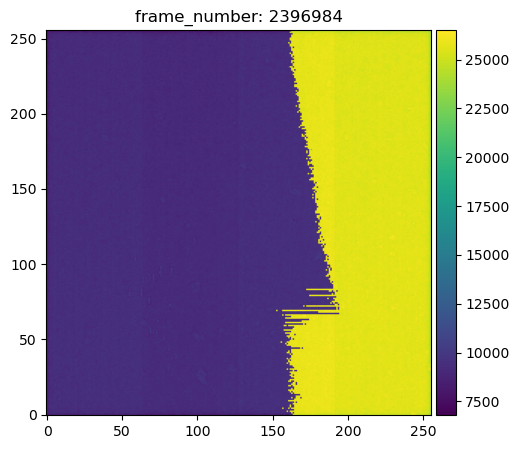

In [43]:
f = JungfrauDataFile(single_chip)
headers, images = f.read_n(1000)
print(f'{images.shape=}')
i = 599
fig, ax = plt.subplots(figsize = (10,5))
im = ax.imshow(images[i], origin = 'lower')
# im.set_clim(1500,2500)
divider = make_axes_locatable(ax)
cax = divider.append_axes("right", size="5%", pad=0.05)
plt.colorbar(im, cax=cax)
ax.set_title(f"frame_number: {headers['framenum'][i]}")